# LeakyBucket eWaterCycle local model

This notebook demo's the LeakyBucket model wrapped in the eWaterCycle LocalModel interface.

In [1]:
from leakybucket.ewatercycle_models import LocalModelLeakyBucket
from ewatercycle.base.forcing import GenericLumpedForcing
import ewatercycle
from pathlib import Path
import numpy as np

shape = Path(ewatercycle.__file__).parent / "testing/data/Rhine/Rhine.shp"

cmip_dataset = {
    "dataset": "EC-Earth3",
    "project": "CMIP6",
    "grid": "gr",
    "exp": ["historical",],
    "ensemble": "r6i1p1f1",
}

forcing = GenericLumpedForcing.generate(
    dataset=cmip_dataset,
    start_time="2000-01-01T00:00:00Z",
    end_time="2000-12-31T00:00:00Z",
    shape=shape.absolute(),
)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
/home/bart/micromamba/envs/ewatercycle/lib/python3.10/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498


eWaterCycle models (usually) require forcing to be provided to start the model:

In [2]:
model = LocalModelLeakyBucket(forcing=forcing)


Otherwise the interface mostly resembles the BMI:

In [3]:
cfg_file,_ = model.setup(leakiness=0.05)
model.initialize(cfg_file)
model.set_value("storage", np.array([0.]))

The eWaterCycle interface allows retrieving values as an xarray object, which makes plotting easier:

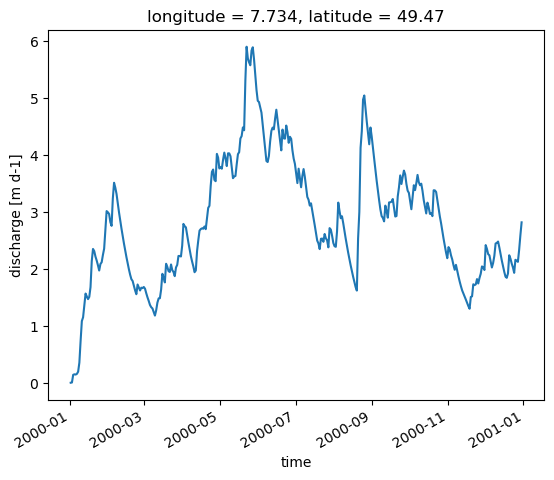

In [8]:
import xarray as xr

discharges = []
while model.time < model.end_time:
    discharges.append(model.get_value_as_xarray("discharge"))
    model.update()

discharge = xr.concat(discharges, dim="time")
discharge.plot()